In [1]:
import hoomd
import hoomd.md
import hoomd.deprecated

In [2]:
hoomd.context.initialize("");

HOOMD-blue v2.3.0 CUDA (8.0) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 
Compiled: 04/25/18
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
notice(2): NVIDIA driver not installed or is too old, ignoring any GPUs in the system.
HOOMD-blue is running on the CPU


In [3]:
system = hoomd.deprecated.init.create_random(N=125, box=hoomd.data.boxdim(L=20))

notice(2): Group "all" created containing 125 particles


In [5]:
snapshot = system.take_snapshot()
print(snapshot.particles.N)

125


In [6]:
print(snapshot.particles.position)

[[ 4.40649     9.943696   -1.6595601 ]
 [-7.437511   -9.997712    8.651147  ]
 [-7.0648823   9.98081    -3.9533486 ]
 [-2.0683854  -8.153228   -5.2782207 ]
 [-3.0887854  -2.2417853  -6.274796  ]
 [ 8.710781   -2.0646505   3.3949208 ]
 [-1.6161096   6.9262185   0.77633464]
 [ 0.49096325  3.70439    -3.7345297 ]
 [ 7.562349   -1.1309421  -5.910955  ]
 [ 0.68827814 -9.452248   -5.4084554 ]
 [-1.653904    8.279241    3.4093502 ]
 [-1.3860286   1.1737965  -0.8559038 ]
 [-6.0379705   8.782556   -7.192261  ]
 [ 4.3194103   6.014891    5.567785  ]
 [-3.7315164   6.05515     9.3652315 ]
 [ 0.36305097  3.8464522  -8.143984  ]
 [ 7.892133    7.300405    7.527783  ]
 [ 6.5920672  -8.299116    6.582938  ]
 [-6.6033916  -4.5390005  -9.2189045 ]
 [ 3.4105608   7.56285    -8.815136  ]
 [-1.5778476   1.8613104  -8.033063  ]
 [-1.7642424   9.15779     3.4330819 ]
 [ 3.8375423  -6.048982    0.66330576]
 [-7.1575975  -3.6896873  -4.207407  ]
 [ 6.6925135   5.6662893   3.7300184 ]
 [-9.316574   -9.634234  

In [7]:
nl = hoomd.md.nlist.cell();

In [66]:
lj = hoomd.md.pair.lj(r_cut=2.5, nlist=nl);

In [67]:
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0);

In [68]:
hoomd.md.integrate.mode_standard(dt=0.005);

In [69]:
all = hoomd.group.all();
nvt = hoomd.md.integrate.nvt(group=all, kT=0.2, tau=0.5)

In [70]:
hoomd.analyze.log(filename="log-output.log",
                  quantities=['potential_energy', 'temperature'],
                  period=100,
                  overwrite=True);

In [71]:
hoomd.dump.gsd("trajectory.gsd", period=2e3, group=all, overwrite=True);

In [72]:
hoomd.run(1e5);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 125
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:11 | Step 87067 / 100000 | TPS 8706.68 | ETA 00:00:01
Time 00:00:13 | Step 100000 / 100000 | TPS 6488.99 | ETA 00:00:00
Average TPS: 8329.88
---------
-- Neighborlist stats:
3805 normal updates / 1000 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 30 / n_neigh_avg: 12.32
shortest rebuild period: 8
-- Cell list stats:
Dimension: 6, 6, 6
n_min    : 0 / n_max: 15 / n_avg: 0.578704
** run complete **


In [73]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output.log', skip_header=True);

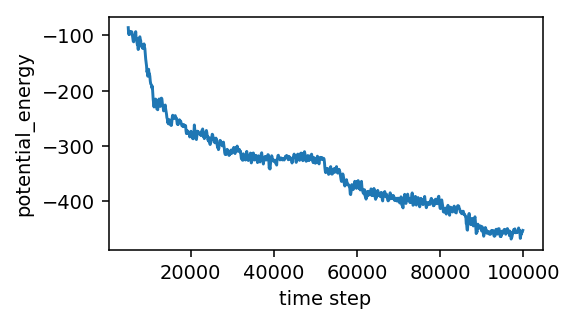

In [74]:
pyplot.figure(figsize=(4,2.2), dpi=140);
start = 50
x=data[:,0]
y=data[:,1]
ave=numpy.mean(y)
pyplot.plot(x[start:],y[start:]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');

Text(0,0.5,'temperature')

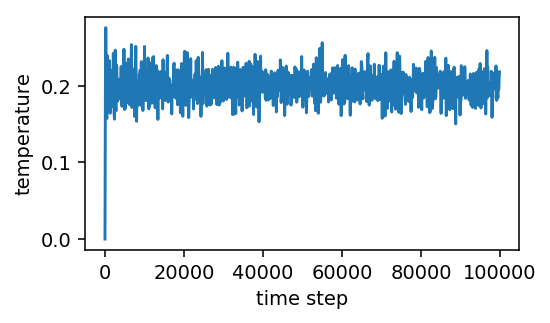

In [75]:
pyplot.figure(figsize=(4,2.2), dpi=140)
pyplot.plot(data[:,0], data[:, 2])
pyplot.xlabel('time step')
pyplot.ylabel('temperature')

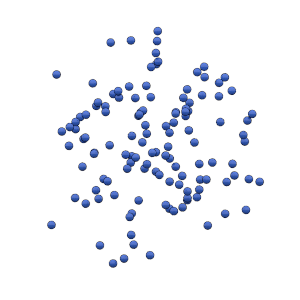

In [76]:
import ex_render
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory.gsd');

In [ ]:
j